<a href="https://colab.research.google.com/github/Nacho2904/pasantiacsc/blob/main/agosto30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Encontrar la solución óptima invirtiendo la matriz, calcular el ECM y graficar la regresión elegida sobre un scatter plot / hecho

2) Predecir ganancias para 35.000 habitantes

3opt) Graficar el problema de optimización en 3-D (bias - weight y Risk) para todos los theta posibles

In [110]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
GANANCIAS = 1
POBLACION = 0

# A la vieja usanza

In [99]:
from urllib import request
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/mc.txt"
f = request.urlopen(example1_url)
dataset = np.matrix(np.loadtxt(f, dtype=float, delimiter=","))
#separamos el dataset usando 80/20

In [100]:
  # separamos las ganancias del dataset
  Y = dataset[:,GANANCIAS]
  Y

matrix([[17.592  ],
        [ 9.1302 ],
        [13.662  ],
        [11.854  ],
        [ 6.8233 ],
        [11.886  ],
        [ 4.3483 ],
        [12.     ],
        [ 6.5987 ],
        [ 3.8166 ],
        [ 3.2522 ],
        [15.505  ],
        [ 3.1551 ],
        [ 7.2258 ],
        [ 0.71618],
        [ 3.5129 ],
        [ 5.3048 ],
        [ 0.56077],
        [ 3.6518 ],
        [ 5.3893 ],
        [ 3.1386 ],
        [21.767  ],
        [ 4.263  ],
        [ 5.1875 ],
        [ 3.0825 ],
        [22.638  ],
        [13.501  ],
        [ 7.0467 ],
        [14.692  ],
        [24.147  ],
        [-1.22   ],
        [ 5.9966 ],
        [12.134  ],
        [ 1.8495 ],
        [ 6.5426 ],
        [ 4.5623 ],
        [ 4.1164 ],
        [ 3.3928 ],
        [10.117  ],
        [ 5.4974 ],
        [ 0.55657],
        [ 3.9115 ],
        [ 5.3854 ],
        [ 2.4406 ],
        [ 6.7318 ],
        [ 1.0463 ],
        [ 5.1337 ],
        [ 1.844  ],
        [ 8.0043 ],
        [ 1.0179 ],


In [101]:
#Separamos la matrix X de inputs del dataset y le anadimos la columna de unos
population = dataset[:,0]
X = np.append(np.ones(len(dataset)).reshape(len(dataset),1), dataset[:,POBLACION], axis=1)
X

matrix([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

Calculamos la seudoinversa mediante la formula derivada

In [102]:
seudoinversa = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.transpose(X))

Finalmente, calculamos los pesos 

In [104]:
w = np.matmul(seudoinversa, Y)
w

matrix([[-3.89578088],
        [ 1.19303364]])

In [135]:
phi = lambda x: float(w[0,0] + w[1,0]*x)

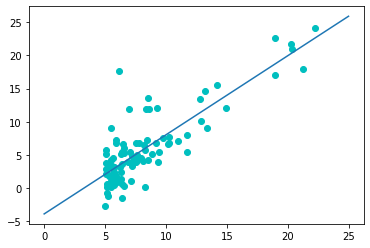

In [138]:
xaxis = np.arange(0, 25, 0.01)
yaxis = np.array([phi(x) for x in xaxis])
plt.plot(xaxis, yaxis)
plt.scatter(np.array(dataset[:,POBLACION]),np.array(dataset[:,GANANCIAS]), c='c')

### Calculamos el error cuadratico medio

In [142]:
ecm = float((1/len(dataset))*sum([(Y[i] - phi(dataset[i,0]))**2 for i in range(0,len(dataset))]))
ecm

8.953942751950358

## Prediccion para 35k habitantes

In [143]:
phi(35000)

41752.28176575754

#Usando tf

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

In [59]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5),loss='MeanSquaredError')
hist = model.fit(x=population, y=Y, batch_size = 10, epochs=100000,callbacks=[es]) #elegimos un gran numero de epochs para que solo corte por convergencia


Epoch 1/100000
10/10 [==============================] - 1s 2ms/step - loss: inf
Epoch 2/100000
10/10 [==============================] - 0s 4ms/step - loss: nan


In [60]:
losses = np.array(hist.history['loss'])

In [62]:
param = model.get_weights()
param

[array([[nan]], dtype=float32), array([nan], dtype=float32)]

In [ ]:
prediction = model.predict(x=np.array(?))